In [8]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
import sweetviz as sv
import arabic_reshaper
from bidi.algorithm import get_display
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [9]:
Jadarat_data = pd.read_csv("D:/Documents/Downloads/usecase5 tuwaiq/Usecase-5_Mushal/Jadarat_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [10]:
Jadarat_data.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both


In [11]:
Jadarat_data.shape

(1470, 18)

In [12]:
dtale.show(Jadarat_data)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [13]:
Jadarat_data.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both


In [14]:
Jadarat_data.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

In [15]:
Jadarat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


In [16]:
Jadarat_data.describe(include="number")

,job_post_id
count,1.470000e+03
mean,2.020203e+13
std,5.863941e+04
min,2.020203e+13
25%,2.020203e+13
50%,2.020203e+13
75%,2.020203e+13
max,2.020203e+13


In [17]:
Jadarat_data.describe(include="object")

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
count,1470,1470,1470,1470,1470,1470,1470,1456,1380,780,1470,1470,1470,1470,1470,1470,1470
unique,324,92,438,444,886,894,2,7,361,615,14,114,393,2,25,6,3
top,بائع,09/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركه العرض المتقن للخدمات التجارية شركة مساهمة...,1-169123,خاص,صغيرة فئة ب,المطاعم مع الخدمة,"['Language data', 'الانجليزية', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 1,0 Years,both
freq,98,47,93,90,16,16,1465,635,65,28,622,523,449,1448,853,833,587


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [18]:
# The dataset was sourced from Kaggle Job Postings in Saudi Arabia Dataset (https://www.kaggle.com/datasets/moayadalkhozayem/job-postings-in-saudi-arabia)and primarily collected from Jadarat

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [19]:
# The data was published in 2023, but it's best to use what the business provided since the timeframe isn't considered.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [20]:
# The use of a single dataset guarantees consistency from the outset

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [21]:
# 1. Sample Appropriateness: "Based on the data characteristics, the sample is appropriate for this analysis."
# 2. Variable Selection: "The needed variables are relevant to the analysis, and irrelevant ones should be removed such as job_post_id , comp_no .

In [22]:
Jadarat_data.head(2)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both


In [23]:

Jadarat_data['benefits'].unique()

array(["['Salary', '5000.0']", "['Salary', '4000.0']",
       "['Salary', '4500.0']", "['Salary', '6000.0']",
       "['Salary', '8000.0']", "['Salary', '10000.0']",
       "['Salary', '7200.0', 'Benefits', 'بدل نقل 800 ريال']",
       "['Salary', '7000.0']", "['Salary', '3000.0']",
       "['Salary', '9000.0']", "['Salary', '12000.0']",
       "['Salary', '5500.0']", "['Salary', '8400.0']",
       "['Salary', '4000.0', 'Benefits', '500']",
       "['Salary', '4000.0', 'Benefits', '2000']",
       "['Salary', '4000.0', 'Benefits', 'تأمين طبي حسب نظام مكتب العمل']",
       "['Salary', '4000.0', 'Benefits', '1000 حسب الخبره']",
       "['Salary', '4000.0', 'Benefits', '4000 SR']",
       "['Salary', '3200.0', 'Benefits', '3200 ريال']",
       "['Salary', '5000.0', 'Benefits', '500 بدل نقل و500 بدل سكن وتامين طبي']",
       "['Salary', '4500.0', 'Benefits', 'حسب سنوات الخبرة']",
       "['Salary', '4500.0', 'Benefits', 'تارقت شهري', 'بونص سنوي']",
       "['Salary', '4500.0', 'Benefits', 

In [24]:
Jadarat_data['gender'].unique()

array(['both', 'M', 'F'], dtype=object)

In [25]:
Jadarat_data['positions'].unique()

array(['0 / 1', '0 / 3', '0 / 2', '0 / 10', '0 / 4', '0 / 5', '3 / 9',
       '0 / 50', '0 / 6', '1 / 4', '1 / 5', '0 / 46', '0 / 8', '0 / 25',
       '0 / 20', '0 / 15', '1 / 2', '1 / 1', '0 / 7', '2 / 4', '5 / 4',
       '0 / 30', '2 / 2', '1 / 3', '0 / 9'], dtype=object)

In [26]:
Jadarat_data['contract'].unique()

array(['دوام كامل', 'عمل عن بعد'], dtype=object)

In [27]:
Jadarat_data['exper'].unique()

array(['0 Years', '2 Years', '4 Years', '10 Years', '7 Years', '12 Years'],
      dtype=object)

In [28]:
Jadarat_data['city'].unique()

array(['AR RIYADH...', 'AD DAMMAM...', 'ATH THUMA...', 'AL HUFUF...',
       'AL BATALI...', 'JEDDAH...', 'HAIL...', 'MAKKAH AL...',
       'GHITHAH...', 'AL MADINA...', 'ABA ASLAB...', 'YANBU...',
       'DHAHRAN...', 'AL AQIQ...', 'AL UYUN...', 'WADI AD D...',
       'TANUMAH...', 'BURAYDAH...', 'BISHAH...', 'AL HAWIYA...',
       'AL KHUBAR...', 'KHAMIS MU...', 'AL JUBAIL...', 'ABRAQIYAH...',
       'AL BAHA...', 'AL KHARJ...', 'ABA AL KI...', 'AL MUBARR...',
       'TABUK...', 'YANBU AS ...', "AL BADAI'...", 'AL ULA...',
       'JIZAN...', "AL 'AQUL...", 'AS SALAMA...', 'AL QUNFID...',
       "JU'RANAH...", 'AT TAIF...', 'AL QARI...', "AR'AR...", 'TURAIF...',
       'BILJURASH...', 'UNAYZAH...', 'ABAR AL M...', 'ABA AL BA...',
       'SHIBRIQAH...', 'NAJRAN...', 'TUBARJAL...', 'UMM TALHA...',
       'HAWTAT BA...', 'ABU AS SA...', 'AL WATAH...', 'AL QURAYY...',
       'AL QATIF...', "AL 'AYDAB...", 'AL LITH...', 'SABYA...',
       'AL KHURMA...', 'AL QAWZ...', 'AL JURF...', 'HAQL..

In [29]:
Jadarat_data['region'].unique()

array(['الرياض', 'المنطقة الشرقية', 'مكة المكرمة', 'حائل',
       'المدينة المنورة', 'الباحة', 'عسير', 'القصيم', 'تبوك', 'جازان',
       'الحدود الشمالية', 'نجران', 'الجوف', 'اخرى'], dtype=object)

In [30]:
#assuming it is in makkah
Jadarat_data[Jadarat_data['region'] == 'اخرى']  

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
499,محاسب,28/03/1444,['محاسب عام'],['يوقم بجميع مهام الوظيفية بإستخدام برنامج حس...,مؤسسة سلاسل بابل للمقاولات,13-97350,خاص,صغيرة فئة ب,ترميمات المباني السكنية والغير سكنية,"['Skill data', 'إجادة استخدام الحاسب', 'محترف'...",اخرى,ABU TARFA...,"['Salary', '4000.0']",دوام كامل,0 / 3,20202026208133,0 Years,F


In [31]:
Jadarat_data['comp_size'].unique()

array(['متوسطة فئة أ', 'متوسطة فئة ب', 'صغيرة فئة ب', 'كبيرة',
       'صغيرة فئة أ', 'عملاقة', 'متوسطة فئة ج', nan], dtype=object)

In [32]:
Jadarat_data['qualif'][0]

"['Language data', 'اللغة الانجليزية', 'محترف']"

In [33]:
Jadarat_data['job_title'].unique()

array(['محاسب', 'بائع', 'أخصائي عمليات موارد بشرية', 'ميكانيكي سيارات',
       'مراقب كاميرات أمنية', 'سكرتير تنفيذي', 'مدير مكتب',
       'أخصائي إدارة مشاريع', 'مصمم جرافيك', 'أخصائي ذكاء أعمال',
       'محلل بيانات', 'مدير حساب عميل', 'مدخل بيانات', 'مطور برامج',
       'أخصائي إدارة اداء', 'كيميائي', 'مهندس زراعي',
       'محلل نظم المعلومات', 'مدير عام', 'مساعد إداري',
       'كاتب علاقات حكومية', 'مندوب مبيعات', 'معلم حضانة', 'فني كيميائي',
       'مهندس كهربائي', 'مهندس ميكانيكي', 'مدير إداري',
       'فني هندسة ميكانيكية', 'فني هندسة كهربائية', 'مدير فرع',
       'موظف استقبال فندق', 'أخصائي تسويق',
       'كاتب استعلامات مركز خدمة عملاء', 'أخصائي خدمة عملاء',
       'أخصائي جودة', 'معلم صفوف أولية', 'مساعد طب بيطري', 'صيدلي',
       'مهندس معماري داخلي', 'مهندس معماري', 'بائع مأكولات ومشروبات',
       'خطاط', 'منسق زهور', 'أخصائي تطوير إداري', 'مدير تسويق',
       'مدير خدمة العملاء', 'مندوب مشتريات', 'فني تدفئة وتهوية وتكييف',
       'مدير رقابة ادارية', 'موظف صندوق محاسبة', 

In [34]:
Jadarat_data['eco_activity'].unique()

array(['أنشطة وكالات السياحة والسفر',
       'تركيب انظمة التبريد وتكييف الهواء وصيانتها واصلاحها',
       'ترميمات المباني السكنية والغير سكنية', nan,
       'الإنشاءات العامة للمباني السكنية',
       'تشغيل المقاصف والكفتيريات على أساس إمتياز محدد ، يشمل ( المقاصف والكفتيريات في المصانع والمكاتب والمستشفيات والمدارس .. الخ )',
       'إعادة تأهيل وهيكلة العمليات الإدارية والمالية والتشغيلية للمنشآت',
       'البيع بالجملة للملابس الرياضية',
       'تقديم خدمات تسويقية نيابةً عن الغير', 'إدارة المشاريع الانشائية',
       'تركيب وصيانة أجهزة ومعدات الإنذار من الحريق',
       'البيع بالجملة للمواد الكيميائية',
       'أنشطة الاستشارات الهندسية والمعمارية',
       'خدمات جمع النفايات البلدية',
       'البيع بالتجزئة لمعدات محطات الوقود وقطع غيارها وتشمل (مضخات الوقود)',
       'إنشاء وإقامة محطات وأبراج الاتصالات السلكية واللاسلكية والرادار',
       'أنشطة المكاتب الرئيسة',
       'أنشطة الخدمات الإدارية المتكاملة للمكاتب',
       'مراكز ضيافة الأطفال الأهلية',
       'خلط وتعبئة العطور 

In [35]:
Jadarat_data['comp_type'].unique()

array(['خاص', 'شبه حكومية'], dtype=object)

In [36]:
Jadarat_data['job_title'].isnull().sum()

0

In [37]:
job_title_counts = Jadarat_data['job_title'].value_counts()
job_title_counts

job_title
بائع                          98
محاسب                         89
أخصائي تسويق                  54
مساعد إداري                   45
موظف استقبال                  45
                              ..
معلم ثانوي لغة أجنبية          1
معلم ابتدائي علوم ورياضيات     1
وكيل مدرسة                     1
أخصائي استمرارية الأعمال       1
مشغل آلة تشطيب رخام            1
Name: count, Length: 324, dtype: int64

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [38]:
Jadarat_data[Jadarat_data.duplicated(keep=False)]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1469,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both


In [39]:
Jadarat_data[Jadarat_data['comp_name'] == "مكتب تصميم المشاريع للاستشارات الهندسية"]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1296,مدير إداري,25/06/1444,['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...,[' المشاركة في تطوير الأهداف الرئيسية للشؤون...,مكتب تصميم المشاريع للاستشارات الهندسية,4-1990473,خاص,NaN,NaN,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '12400.0']",دوام كامل,0 / 1,20202026404052,7 Years,M


In [40]:
Jadarat_data.head(15)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both
5,مراقب كاميرات أمنية,27/05/1444,['الإشراف على عمليات كاميرات المراقبة الأمنية،...,[' الإشراف على عمليات كاميرات المراقبة، والت...,مطاعم تراث الدمشقية للوجبات السريعة,1-1527188,خاص,صغيرة فئة ب,تشغيل المقاصف والكفتيريات على أساس إمتياز محدد...,"['Skill data', 'اجادة الحاسب والتقنية ', 'متوس...",الرياض,AR RIYADH...,"['Salary', '4500.0']",عمل عن بعد,0 / 1,20202026350031,0 Years,both
6,سكرتير تنفيذي,27/05/1444,['تنظيم المواعيد وإعداد المذكرات وإجراء المراس...,[' تنظيم مواعيد المدير/الرئيس وتذكيره بها، و...,شركة بيانات و دعم القرار للاستشارات في مجال ال...,9-2027654,خاص,صغيرة فئة أ,إعادة تأهيل وهيكلة العمليات الإدارية والمالية ...,"['Language data', 'لغة انجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '6000.0']",دوام كامل,0 / 2,20202026349999,4 Years,F
7,مدير مكتب,27/05/1444,['الإشراف المباشرعلى أنشطة إدارة وتخطيط وتنظيم...,[' إدارة وتوجيه عمليات وإجراءات تنسيق اجتماع...,شركة بيانات و دعم القرار للاستشارات في مجال ال...,9-2027654,خاص,صغيرة فئة أ,إعادة تأهيل وهيكلة العمليات الإدارية والمالية ...,"['Language data', 'لغة انجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '8000.0']",دوام كامل,0 / 1,20202026349997,4 Years,F
8,أخصائي إدارة مشاريع,27/05/1444,['تحليل عناصر وفعاليات المشروع ووضع الخطط والب...,[' تحليل عناصر وفعاليات المشروع وارتباطها وت...,شركة بيانات و دعم القرار للاستشارات في مجال ال...,9-2027654,خاص,صغيرة فئة أ,إعادة تأهيل وهيكلة العمليات الإدارية والمالية ...,"['Language data', 'لغة انجليزية', 'محترف', 'Pr...",الرياض,AR RIYADH...,"['Salary', '10000.0']",دوام كامل,0 / 3,20202026349992,2 Years,F
9,مصمم جرافيك,26/05/1444,['تطوير الأفكار الإبداعية والمفاهيم لتوصيل الر...,[' التنسيق مع مالك التصميم (عملاء محليون أو ...,شركة بيانات و دعم القرار للاستشارات في مجال ال...,9-2027654,خاص,صغيرة فئة أ,إعادة تأهيل وهيكلة العمليات الإدارية والمالية ...,"['Language data', 'لغة انجليزية', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026349583,4 Years,F


In [41]:
Jadarat_data[Jadarat_data['comp_name'] =="شركة مطعم بيت الشاورما لتقديم الوجبات"]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
47,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...",شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,NaN,"['Language data', 'العربية ', 'محترف']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 50,20202026346891,0 Years,M
846,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...",شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,التنظيف العام للمباني,"['Language data', 'العربية ', 'محترف']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 50,20202026346891,0 Years,M
1062,أخصائي تسويق,11/06/1444,['تحديد الأهداف وتطوير السياسات التسويقية للسل...,[' تحديد الأهداف العامة والفرعية للتسويق وتط...,شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,التنظيف العام للمباني,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0']",عمل عن بعد,0 / 6,20202026393461,0 Years,F
1063,محاسب,11/06/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,التنظيف العام للمباني,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026393456,0 Years,F
1064,موظف صندوق محاسبة,11/06/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,التنظيف العام للمباني,"['Language data', 'العربية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 50,20202026393440,0 Years,M
1360,مأمور سنترال,18/06/1444,['الإشراف على عمليات تشغيل مقسمات الهاتف، وعمل...,[' الإشراف على تشغيل مقسمات الهاتف ولوحات تح...,شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,التنظيف العام للمباني,"['Language data', 'العربية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 10,20202026398913,0 Years,F
1372,أخصائي تسويق,14/06/1444,['تحديد الأهداف وتطوير السياسات التسويقية للسل...,[' تحديد الأهداف العامة والفرعية للتسويق وتط...,شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,التنظيف العام للمباني,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026394979,0 Years,F


In [42]:
Jadarat_data[Jadarat_data['eco_activity'].isnull()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
25,مدير عام,26/05/1444,['المشاركة في وضع الأهداف العامة والسياسات وال...,[' المشاركة في وضع الأهداف والسياسات والمباد...,ورشة اضواء المشاعل للحدادة والالمنيوم,10-2010602,خاص,صغيرة فئة أ,NaN,"['Skill data', 'حداد', 'متوسط', 'Language data...",المدينة المنورة,AL MADINA...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026348601,0 Years,M
40,مدير فرع,25/05/1444,['المشاركة في وضع وإعداد أهداف الفرع في ضوء تو...,[' المشاركة في وضع وإعداد الخطط والأهداف الخ...,شركة الزي للتجارة,9-2079452,خاص,متوسطة فئة أ,NaN,"['Language data', 'العربية', 'محترف', 'الانجلي...",المنطقة الشرقية,DHAHRAN...,"['Salary', '4500.0', 'Benefits', 'حسب سنوات ال...",دوام كامل,0 / 1,20202026347650,2 Years,both
42,موظف استقبال فندق,25/05/1444,['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...,[' الحفاظ على قائمة الحجوزات، وتوفير السجلات...,فندق قصر الواحة الفندقية,1-2440535,خاص,صغيرة فئة ب,NaN,"['Skill data', 'الاستقبال الفندقي', 'محترف', '...",الرياض,AR RIYADH...,"['Salary', '4500.0', 'Benefits', 'تارقت شهري',...",دوام كامل,0 / 4,20202026347394,2 Years,both
47,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...",شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,NaN,"['Language data', 'العربية ', 'محترف']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 50,20202026346891,0 Years,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,مشرف مدخلي البيانات,26/06/1444,['الإشراف على مدخلي البيانات والتأكد من صحة ال...,[' تدقيق البيانات بعد إدخالها، والتأكد من صح...,خالد عوض الجوهي للمقاولات,1-2073853,خاص,NaN,NaN,"['Skill data', 'اتقان الحاسب ', 'متوسط', 'Lang...",الرياض,HAFIRAT N...,"['Salary', '4500.0']",دوام كامل,0 / 5,20202026405354,0 Years,both
1451,فني مختبر طبي,25/06/1444,['تفقد وتشغيل وخدمة معدات المختبر،أخذ عينات ال...,[' تفقد وتشغيل وخدمة معدات حفظ وفحص العينات ...,مجمع ابتسامة العائلة الطبي,1-2599562,خاص,NaN,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026404173,0 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,NaN,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,20202026398972,0 Years,M


In [43]:
Jadarat_data[Jadarat_data['qualif'].isnull()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
14,مصمم جرافيك,26/05/1444,['لديه الخبرة في اخراج العروض التقديمية الرس...,['لديه الخبرة في اخراج العروض التقديمية الرس...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026349504,4 Years,M
15,مدخل بيانات,26/05/1444,['التمكن من استخدام برامج مايكروسفت أوفيس'],['التمكن من استخدام برامج مايكروسفت أوفيس'],مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '3000.0']",دوام كامل,0 / 2,20202026349475,2 Years,M
16,مطور برامج,26/05/1444,[' تحليل وادارة تطبيقات باستخدام الأدوات البر...,[' تحليل وادارة تطبيقات باستخدام الأدوات ال...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '9000.0']",دوام كامل,0 / 1,20202026349439,4 Years,M
17,أخصائي إدارة اداء,26/05/1444,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '12000.0']",دوام كامل,0 / 1,20202026349417,10 Years,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,أخصائي عمليات موارد بشرية,25/06/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركـة ذوق للتجارة,1-1526321,خاص,صغيرة فئة ب,البيع بالتجزئة للوكلاء بالعمولة بدون محلات,NaN,الرياض,AR RIYADH...,"['Salary', '5556.0']",دوام كامل,0 / 1,20202026403956,0 Years,F
1455,فني تصميم داخلي,24/06/1444,['تصميم أنظمة الألوان وطرز الأثاث، والمواد الم...,[' وضع التصاميم للمشروعات الداخلية، وإدارة ف...,شركة نمو للبحوث والدراسات (شركة شخص واحد),1-2166711,خاص,صغيرة فئة أ,مراكز البحوث والدراسات الاجتماعية,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0', 'Benefits', 'عموله']",دوام كامل,0 / 1,20202026403328,2 Years,both
1460,كيميائي,23/06/1444,['دراسة خصائص المواد الكميائية للصناعات الكيمي...,[' إعداد برامج تشغيل الأجهزة والمعدات المخبر...,شركة نواف صالح البطي للتجارة,1-2604723,خاص,صغيرة فئة ب,تجارة الجملة والتجزئه في أنواع أخرى من المركبا...,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026402275,0 Years,F
1464,بائع,21/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...,8-1977608,خاص,صغيرة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AL HUFUF...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026401107,2 Years,F


In [44]:
Jadarat_data[Jadarat_data['comp_size'].isnull()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1296,مدير إداري,25/06/1444,['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...,[' المشاركة في تطوير الأهداف الرئيسية للشؤون...,مكتب تصميم المشاريع للاستشارات الهندسية,4-1990473,خاص,NaN,NaN,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '12400.0']",دوام كامل,0 / 1,20202026404052,7 Years,M
1393,موظف صندوق محاسبة,01/07/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مغاسل نسيم الفل للملابس,15-1963098,خاص,NaN,NaN,NaN,المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0']",دوام كامل,0 / 3,20202026407308,0 Years,both
1399,موظف صندوق محاسبة,29/06/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مغاسل نسيم الفل للملابس,15-1963098,خاص,NaN,NaN,NaN,الرياض,AL KHUBAR...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026407112,0 Years,both
1401,وسيط عقاري,29/06/1444,['مساعدة البائعين وتقديم اقتراحات بأفضل طريقة ...,[' تقييم رغبات العملاء والميزانيات المحددة و...,مؤسسة فانس العقارية,1-2268591,خاص,NaN,NaN,"['Skill data', 'عقاري', 'مبتدئ', 'Language dat...",الرياض,RUMAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026407053,0 Years,F
1409,محامي,29/06/1444,['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...,[' استقبال القضية وتحديد نوعها وتحليل عناصره...,شركة الخبراء المتحدون للمحاماة والاستشارات الق...,1-2334348,خاص,NaN,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026406912,2 Years,both
1411,أخصائي قانوني,29/06/1444,['مساعدة العملاء والمنشآت في مختلف المسائل الق...,[' تأهيل الطلبات وتقييم الخيارات القانونية، ...,شركة الخبراء المتحدون للمحاماة والاستشارات الق...,1-2334348,خاص,NaN,NaN,"['Skill data', 'إدارة وتنظيم المستندات والوثائ...",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406840,0 Years,both
1421,مدير مالي,29/06/1444,['المشاركة في تطوير الأهداف الرئيسية للإدارة ا...,[' المشاركة في تطوير الأهداف الرئيسية للإدار...,شركة إرفاء المحدودة (شركة شخص واحد),17-1989300,خاص,NaN,NaN,NaN,حائل,ABA AL HI...,"['Salary', '14000.0']",دوام كامل,0 / 1,20202026406695,7 Years,both
1426,مصفف شعر,29/06/1444,['تقديم المشورة للعميل وتسريح الشعر وتصفيفه وت...,[' استقبال العميل وإجلاسه على كرسي القص ووض...,صالون تشرين ثاني للتزيين النسائي,1-2593881,خاص,NaN,NaN,"['Skill data', 'صف الشعر', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406598,4 Years,F
1432,موظف صندوق محاسبة,27/06/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مؤسسة التذوق الحلو لتقديم الوجبات,1-2559144,خاص,NaN,NaN,NaN,الرياض,AL BIYAD...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406120,0 Years,M
1436,أخصائي علاج طبيعي,26/06/1444,['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...,[' دراسة وتحليل برنامج المعالجة الطبيعية الم...,مجمع ارجوان سامي بن نائف العتيبي الطبي,2-1949575,خاص,NaN,NaN,NaN,الرياض,AL KHARJ...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026405893,0 Years,F


In [45]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [46]:
Jadarat_data.isnull().sum().sort_values(ascending = False)

qualif          690
eco_activity     90
comp_size        14
region            0
exper             0
job_post_id       0
positions         0
contract          0
benefits          0
city              0
job_title         0
job_date          0
comp_type         0
comp_no           0
comp_name         0
job_tasks         0
job_desc          0
gender            0
dtype: int64

In [47]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [48]:
Jadarat_data.dtypes

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
job_post_id      int64
exper           object
gender          object
dtype: object

In [49]:
# go to clean them 

In [43]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [60]:
#Define the outlier condition (salary greater than 15000)
salary_outliers = Jadarat_data[Jadarat_data['Salary'] > 15000]

#Create a new DataFrame for non-outliers (salary less than or equal to 15000)
non_outliers = Jadarat_data[Jadarat_data['Salary'] <= 15000]


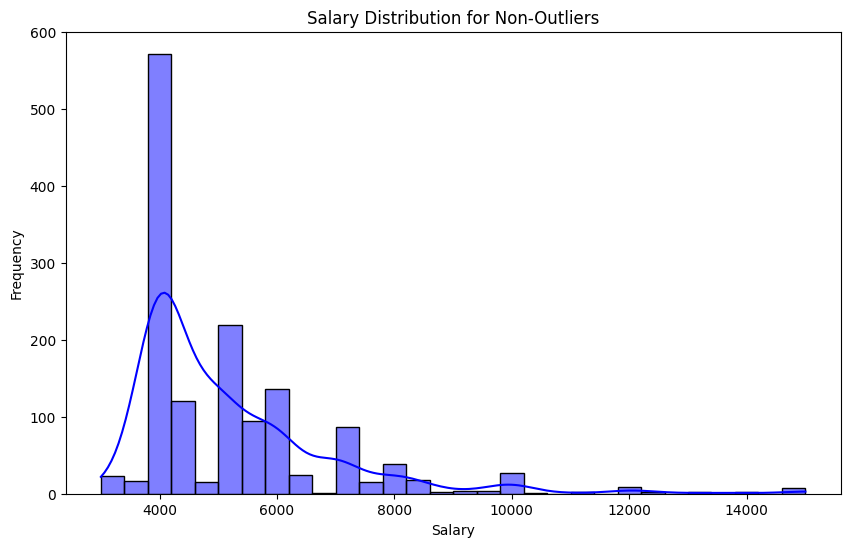

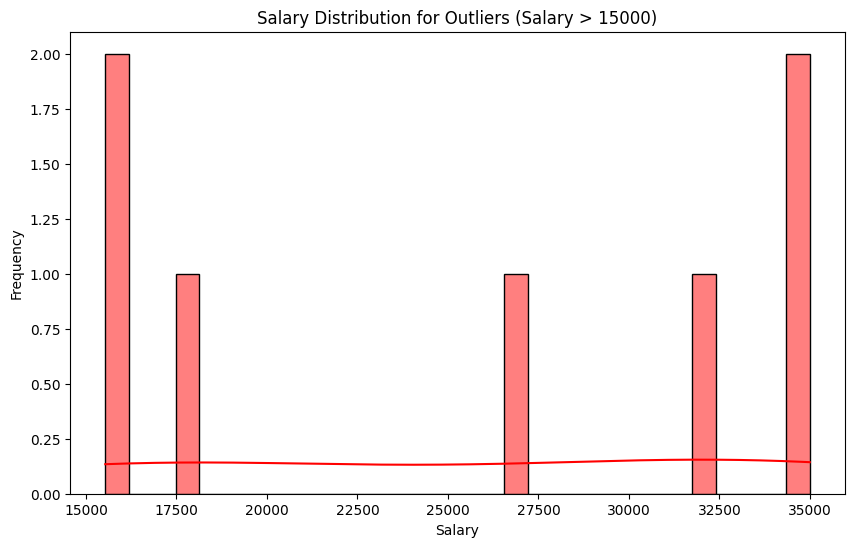

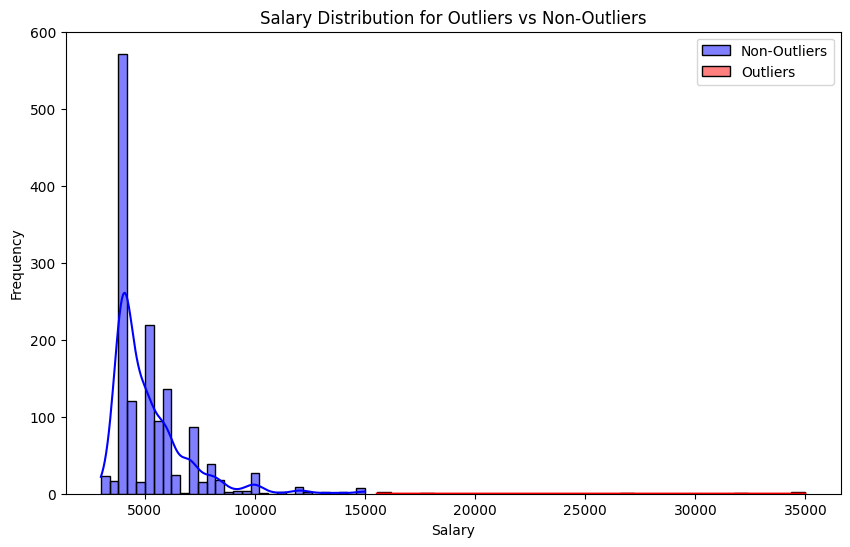

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Plot histogram for Salary Distribution of Non-Outliers
plt.figure(figsize=(10, 6))
sns.histplot(non_outliers['Salary'], bins=30, kde=True, color='blue')
plt.title('Salary Distribution for Non-Outliers')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Step 2: Plot histogram for Salary Distribution of Outliers
plt.figure(figsize=(10, 6))
sns.histplot(salary_outliers['Salary'], bins=30, kde=True, color='red')
plt.title('Salary Distribution for Outliers (Salary > 15000)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Step 3: Combined visualization of Non-Outliers and Outliers
plt.figure(figsize=(10, 6))
sns.histplot(non_outliers['Salary'], bins=30, kde=True, color='blue', label='Non-Outliers')
sns.histplot(salary_outliers['Salary'], bins=30, kde=True, color='red', label='Outliers')
plt.title('Salary Distribution for Outliers vs Non-Outliers')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()


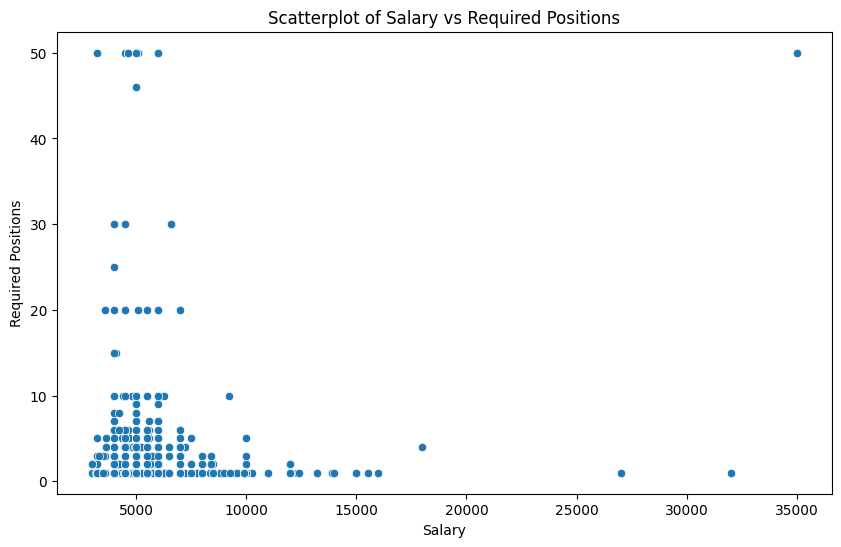

In [62]:
# Scatterplot between Salary and required_positions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Jadarat_data['Salary'], y=Jadarat_data['required_positions'])
plt.title('Scatterplot of Salary vs Required Positions')
plt.xlabel('Salary')
plt.ylabel('Required Positions')
plt.show()


In [ ]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [ ]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [50]:
# Step 1: Fill null 'eco_activity' with the non-null value from the same 'comp_name'
Jadarat_data['eco_activity'] = Jadarat_data.groupby('comp_name')['eco_activity'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

# Step 2: Handle any remaining missing values by filling with 'unknown'
Jadarat_data['eco_activity'] = Jadarat_data['eco_activity'].fillna('unknown')

# Verify the result to check if null values are filled
missing_eco_activity_after = Jadarat_data[Jadarat_data['eco_activity'].isnull()]

# Output any remaining missing values
missing_eco_activity_after

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender


In [51]:
Jadarat_data.fillna({'comp_size': 'Not specified'}, inplace=True)

In [52]:
# Step 1: Group by 'job_desc' and 'job_title' to get the most frequent 'qualif' in each group
most_common_qualif = Jadarat_data.groupby(['job_desc', 'job_title'])['qualif'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 2: Map the most common 'qualif' to the original dataframe
Jadarat_data['qualif'] = Jadarat_data['qualif'].fillna(Jadarat_data.groupby(['job_desc', 'job_title'])['qualif'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))

# Step 3: Handle any remaining missing values by filling with 'unknown'
Jadarat_data['qualif'] = Jadarat_data['qualif'].fillna('unknown')

# Verify the result
missing_qualif_after = Jadarat_data[Jadarat_data['qualif'].isnull()]

# Output any remaining missing values
missing_qualif_after


,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender


In [53]:
# Step 1: Split the 'positions' column into 'filling_positions' and 'required_positions' by the '/' separator
Jadarat_data[['filling_positions', 'required_positions']] = Jadarat_data['positions'].str.split('/', expand=True)

# Step 2: Clean up any extra spaces around the values (if any)
Jadarat_data['filling_positions'] = Jadarat_data['filling_positions'].str.strip()
Jadarat_data['required_positions'] = Jadarat_data['required_positions'].str.strip()

# Verify the result
Jadarat_data[['positions', 'filling_positions', 'required_positions']].head()


,positions,filling_positions,required_positions
0,0 / 1,0,1
1,0 / 3,0,3
2,0 / 2,0,2
3,0 / 10,0,10
4,0 / 1,0,1


In [54]:
# Step 2: Convert the 'job_desc' column from list to string
Jadarat_data['job_desc'] = Jadarat_data['job_desc'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [55]:
import ast

# Step 1: Convert the string representation of the list into an actual list
Jadarat_data['benefits'] = Jadarat_data['benefits'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Step 2: Create the 'Salary' column by extracting the salary value
Jadarat_data['Salary'] = Jadarat_data['benefits'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 and 'Salary' in str(x[0]) else None)

# Step 3: Create the 'Benefits' column by extracting the remaining items in the list (if any)
Jadarat_data['Benefits'] = Jadarat_data['benefits'].apply(lambda x: ', '.join(x[2:]) if isinstance(x, list) and len(x) > 2 else None)

# Verify the result
print(Jadarat_data[['Salary', 'Benefits']].head())


   Salary Benefits
0  5000.0     None
1  5000.0     None
2  4000.0     None
3  5000.0     None
4  5000.0     None


In [56]:
# Convert any list-like column to a string representation (e.g., 'job_desc', 'benefits')
Jadarat_data['job_desc'] = Jadarat_data['job_desc'].apply(lambda x: str(x) if isinstance(x, list) else x)
Jadarat_data['benefits'] = Jadarat_data['benefits'].apply(lambda x: str(x) if isinstance(x, list) else x)

# Remove all duplicated rows
Jadarat_data = Jadarat_data.drop_duplicates(keep=False)


In [57]:
Jadarat_data['Benefits'] = Jadarat_data['Benefits'].fillna('unknown')

In [58]:
Jadarat_data[Jadarat_data.duplicated(keep=False)]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,...,benefits,contract,positions,job_post_id,exper,gender,filling_positions,required_positions,Salary,Benefits


In [59]:
# Drop 'benefits' ,"job_post_id" and 'positions' columns
Jadarat_data = Jadarat_data.drop(columns=['job_post_id'])
Jadarat_data = Jadarat_data.drop(columns=['benefits', 'positions'])

In [60]:
# Clean the 'city' column by removing unnecessary characters (like ellipses)
Jadarat_data['city'] = Jadarat_data['city'].apply(lambda x: x.split('...')[0] if isinstance(x, str) else x)


In [61]:
Jadarat_data['filling_positions']=Jadarat_data['filling_positions'].astype(int)
Jadarat_data['required_positions']=Jadarat_data["required_positions"].astype(int)
Jadarat_data['Salary']=Jadarat_data["Salary"].astype(float)

In [62]:
Jadarat_data.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,contract,exper,gender,filling_positions,required_positions,Salary,Benefits
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH,دوام كامل,0 Years,both,0,1,5000.0,unknown
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط']",المنطقة الشرقية,AD DAMMAM,دوام كامل,0 Years,both,0,3,5000.0,unknown
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA,دوام كامل,2 Years,both,0,2,4000.0,unknown
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,unknown,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF,دوام كامل,0 Years,M,0,10,5000.0,unknown
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH,دوام كامل,0 Years,both,0,1,5000.0,unknown


### Correcting errors

-------------------

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

## What proportion of job postings is attributed to each region within the kingdom?

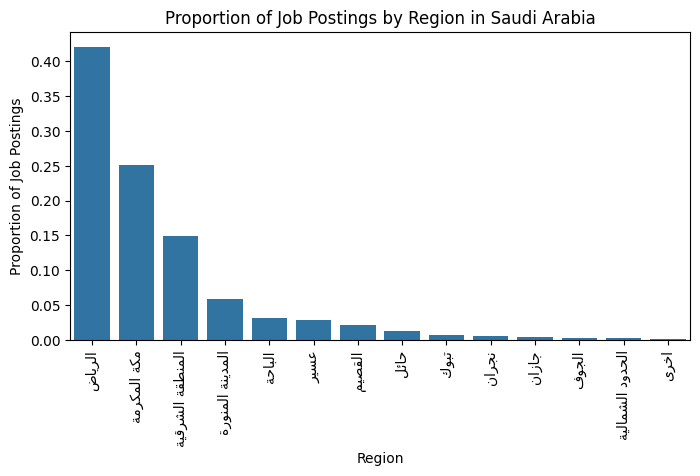

In [63]:
# Assuming Jadarat_data is your DataFrame
region_counts = Jadarat_data['region'].value_counts(normalize=True)

# Reshape and apply bidi algorithm to Arabic text
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in region_counts.index]

# Plot the proportion of job postings per region
plt.figure(figsize=(8, 4))
sns.barplot(x=reshaped_labels, y=region_counts.values)
plt.title('Proportion of Job Postings by Region in Saudi Arabia')
plt.xlabel('Region')
plt.ylabel('Proportion of Job Postings')
plt.xticks(rotation=90)
plt.show()

## Is there a gender preference indicated in the job postings?

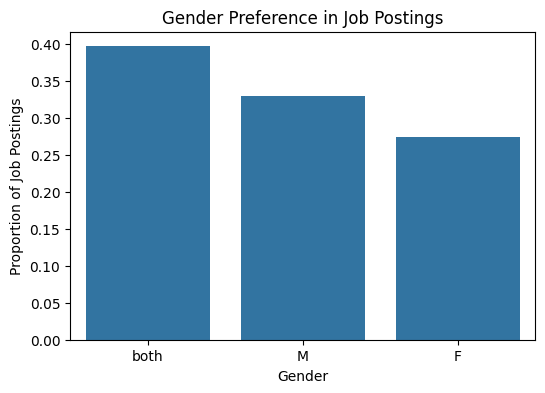

In [64]:
# Calculate the count of job postings by gender preference (if any)
gender_counts = Jadarat_data['gender'].value_counts(normalize=True)

# Plot the gender preference distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Preference in Job Postings')
plt.xlabel('Gender')
plt.ylabel('Proportion of Job Postings')
plt.show()


## What is the expected salary range for fresh graduates?

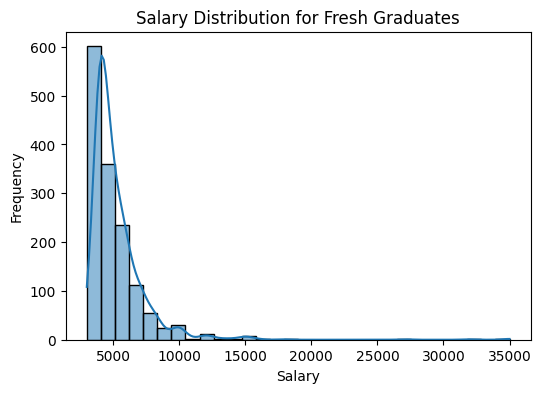

In [65]:
fresh_grads = Jadarat_data[Jadarat_data['exper'].str.contains('Years', na=False)]
fresh_grads['Salary'] = fresh_grads['Salary'].apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(6, 4))
sns.histplot(fresh_grads['Salary'], bins=30, kde=True)
plt.title('Salary Distribution for Fresh Graduates')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

## Are job opportunities predominantly targeted at individuals with experience, or is there room for fresh graduates as well?

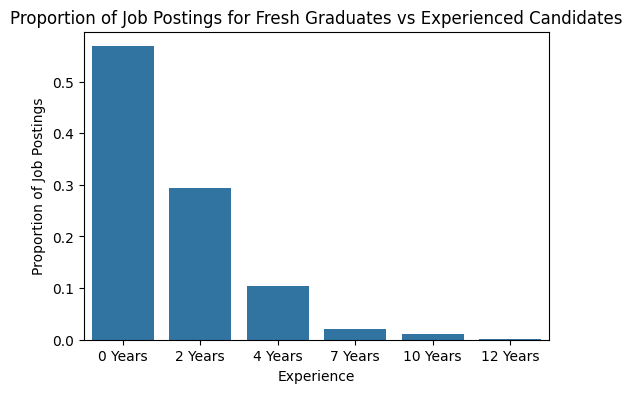

In [66]:
experience_counts = Jadarat_data['exper'].value_counts(normalize=True)
plt.figure(figsize=(6, 4))
sns.barplot(x=experience_counts.index, y=experience_counts.values)
plt.title('Proportion of Job Postings for Fresh Graduates vs Experienced Candidates')
plt.xlabel('Experience')
plt.ylabel('Proportion of Job Postings')
plt.show()

## Contract Type Distribution

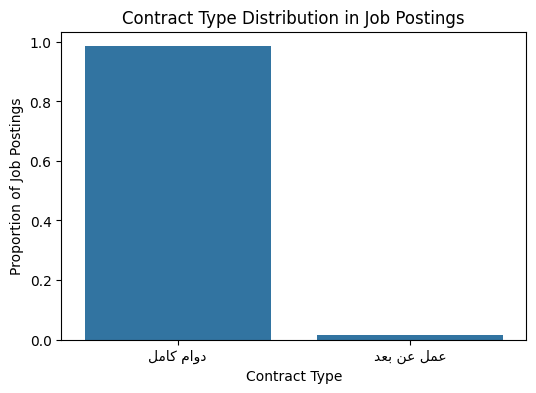

In [67]:
# Assuming Jadarat_data is your DataFrame
contract_counts = Jadarat_data['contract'].value_counts(normalize=True)

# Reshape and apply bidi algorithm to Arabic text
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in contract_counts.index]

# Plot the contract type distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=reshaped_labels, y=contract_counts.values)
plt.title('Contract Type Distribution in Job Postings')
plt.xlabel('Contract Type')
plt.ylabel('Proportion of Job Postings')
plt.show()

In [68]:
Jadarat_data.to_csv("cleaned_Jadarat_data.csv",index=False)